## Day 70 - DIY Solution

**Q1. Problem Statement: Gradient Boosting and XGBoost**<br>
Write a Python program that reads the gender_classification.csv (provided on LMS) file into a DataFrame, where the dataset contains data of different parameters measured on human face classified based on gender and gender is our dependent variable, the following are the tasks that are to be taken into consideration while constructing Gradient Boosting and XGBoost model, to predict gender using given data and compare their accuracy.
1.	Load the given dataset into a data frame
2.	Find missing values and treat them
3.	Observe distribution of target variable (‘gender’ is our target variable)
4.	Do standardization on continuous data 'forehead_width_cm' and 'forehead_height_cm'
5.	Extract dependent and independent variables into the y & x data frame
6.	Split your data into train and test, by 30% as test size
7.	Build a Gradient boosting classifier model and XGBoost model and compare their accuracy


This dataset contains 7 features and a label column.<br>
<br>
**longhair** - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
<br>**foreheadwidthcm** - This column is in CM's. This is the width of the forehead.
<br>**foreheadheightcm** - This is the height of the forehead and it's in Cm's.
<br>**nosewide** - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
<br>**noselong** - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
<br>**lipsthin** - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
<br>**distancenosetoliplong** - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".
<br>**gender** - This is either "Male" or "Female".

**Step-1:** Import required libraries

In [142]:
#Import the required libraries
import pandas as pd
import dask.dataframe as dd
pd.options.display.max_columns=False
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

**Step-2:**  Load Given dataset into dataframe.

In [143]:
#Import the data set
data = pd.read_csv('gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


**Step-3:**  Visulize the shape of dataset.

In [144]:
data.shape



(5001, 8)

**Step-4:** Check basic information of each column

In [145]:
data.info()                                                                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


**Step-5:**  General discription of catagirical features.

In [146]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


**Step-6:**  Missing value analysis.

In [147]:
data.isna().sum() # no missing value is found, so we can skip other task related  to missing value analysis.

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

**Step-7:**  Distribution Of Target Variable

In [148]:
target_ratio = pd.DataFrame({'Counts':data.gender.value_counts(),'Percentage':data.gender.value_counts()/len(data)})
target_ratio

,Counts,Percentage
Female,2501,0.5001
Male,2500,0.4999


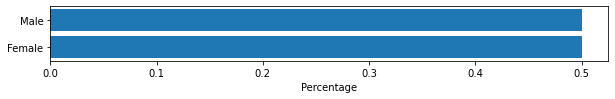

In [149]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()
#our data is balanced 

In [150]:
# standardize the contninuous data
con = data[['forehead_width_cm','forehead_height_cm']]
cat = data[['long_hair','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long']]

**Step-8:**  Do standesization for con data

In [151]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(con)

In [152]:
X_std

array([[-1.24793291,  0.28397148],
       [ 0.73938869, -1.00941773],
       [-1.24793291,  0.65351125],
       ...,
       [-0.25427211, -0.45510807],
       [ 0.01672629,  0.46874136],
       [ 2.00404789, -1.00941773]])

**Step-9:**  Convert generated output to datframe

In [153]:
std_data = pd.DataFrame(data=X_std, index=con.index, columns=con.columns)

In [154]:
std_data

,forehead_width_cm,forehead_height_cm
0,-1.247933,0.283971
1,0.739389,-1.009418
2,-1.247933,0.653511
3,1.100720,0.283971
4,0.287725,-0.085568
...,...,...
4996,0.378057,-1.563727
4997,-1.157600,-1.009418
4998,-0.254272,-0.455108
4999,0.016726,0.468741


**Step-10:** Concat both data frame 

In [155]:
input_features=pd.concat([std_data,cat],axis=1)   
input_features

,forehead_width_cm,forehead_height_cm,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,-1.247933,0.283971,1,1,0,1,1
1,0.739389,-1.009418,0,0,0,1,0
2,-1.247933,0.653511,0,1,1,1,1
3,1.100720,0.283971,0,0,1,1,1
4,0.287725,-0.085568,1,0,0,0,0
...,...,...,...,...,...,...,...
4996,0.378057,-1.563727,1,0,0,0,0
4997,-1.157600,-1.009418,1,0,0,0,0
4998,-0.254272,-0.455108,1,0,0,0,0
4999,0.016726,0.468741,1,0,0,0,0


In [156]:
input_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   forehead_width_cm          5001 non-null   float64
 1   forehead_height_cm         5001 non-null   float64
 2   long_hair                  5001 non-null   int64  
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 273.6 KB


**Step-11:** Do label encoding for dependent feature

In [157]:
lb=LabelEncoder()
data.gender = lb.fit_transform(data.gender) 

In [158]:
X = input_features.copy()
y = data.gender

**Step-12:**  Seprate dependent and independent feature into X and y. 

In [159]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=124)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 7)
(1501, 7)
(3500,)
(1501,)


**GradientBoostingClassifier**<br/>

**Step-13:**  Build a Gradient boosting classifier model.

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)

In [162]:
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [163]:
gb_pred=gb_clf.predict(x_test)

0.966688874083944



Confusion matrix for GradientBoostingClassifier


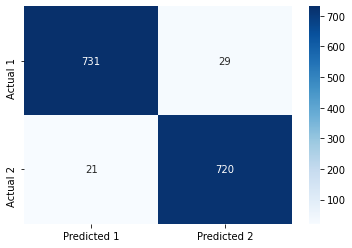



 Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       760
           1       0.96      0.97      0.97       741

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [164]:
print(metrics.accuracy_score(y_test,gb_pred))
print('\n\n')
print('Confusion matrix for GradientBoostingClassifier')
gb_cm=metrics.confusion_matrix(y_test, gb_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(gb_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('\n\n Classification report')
print(metrics.classification_report(y_test,gb_pred))

**XGBoost**<br/>

**Step-14:**  Build a XG boost classifier model.

In [165]:
from xgboost.sklearn import XGBClassifier

In [166]:
xgb_model = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42) 

In [167]:
xgb_model.fit(x_train, y_train)

C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_class=2, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, seed=42, subsample=1, tree_method='exact', ...)

In [168]:
xgboost_pred=xgb_model.predict(x_test)

0.966688874083944



Confusion matrix for  XG boost classifier


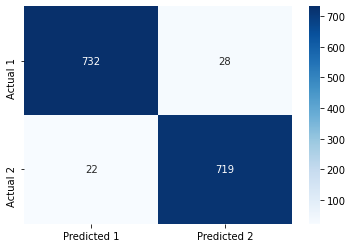



 Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       760
           1       0.96      0.97      0.97       741

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [169]:
print(metrics.accuracy_score(y_test,xgboost_pred))
print('\n\n')
print('Confusion matrix for  XG boost classifier')
xgboost_cm=metrics.confusion_matrix(y_test, xgboost_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('\n\n Classification report')
print(metrics.classification_report(y_test,xgboost_pred))

In [170]:
predict_probabilities = xgb_model.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.9947386177995596


**XgBoost with Grid Search**

**Step-15:**  Build a XG boost classifier model with help of grid search.

In [171]:
xgb_gs_clf = XGBClassifier(num_class = 2,
                           objective="multi:softprob",
                           eval_metric="mlogloss",
                           seed=42)                         
                        
param_grid = {"max_depth": [10,15,20],
              "n_estimators": range(5,20,5) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    5.4s finished
C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Abhishek\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


{'gamma': 0.03, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 15}

In [172]:
xgboost_y_pred=grid_search.predict(x_test)                                      # Validating the model by predicting the test data

0.9713524317121919


Confusion matrix for optimal XG boost classifier


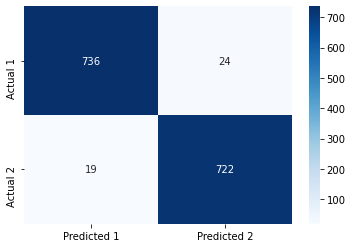




 Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       760
           1       0.97      0.97      0.97       741

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [173]:
print(metrics.accuracy_score(y_test,xgboost_y_pred))
print('\n\nConfusion matrix for optimal XG boost classifier')
xgboost_cfm=metrics.confusion_matrix(y_test, xgboost_y_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('\n\n\n Classification report')
print(metrics.classification_report(y_test,xgboost_y_pred))

In [174]:
predict_probabilities = grid_search.predict_proba(x_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.9934050713829107
